# Phys 512: Homework 1

## 1.Roundoff error in long term integrations of planetary orbits

 ### a)
 
Newton's law of universal gravitation can be written as a vector equation to account for the direction of the gravitational force as well as its magnitude. In this formula, quantities in bold represent vectors.
    $$\textbf{F}_{21} = -G\frac{m_1m_2}{|\textbf{r}_{21}|^2}\hat{\textbf{r}}_{21}$$
Where

·$\textbf{F}_{21}$ is the force applied on object 2 exerted by object 1,

·$G$ is the gravitational constant,

·$m_1$ and $m_2$ are respectively the masses of objects 1 and 2,

·$|\textbf{r}_{21}| = |\textbf{r}_2 − \textbf{r}_1|$ is the distance between objects 1 and 2, and

·$\hat{\textbf{r}}_{21}=\frac{\textbf{r}_2 − \textbf{r}_1}{|\textbf{r}_2 − \textbf{r}_1|}$ is the unit vector from object 1 to object 2.

Since we can assume that the sun is fixed at the origin:
$$\textbf{r}_2 = (0,0)$$

We get the final expression for our force (and by extencion for our acceleration):
$$\textbf{F}_{21} = -G\frac{m_1m_2}{|\textbf{r}_{2}|^2}\frac{\textbf{r}_{21}}{|\textbf{r}_2|}$$

We will define the position of earth in the 2D plane as a vector $\textbf{r}_2 = (x_2,y_2)$.

Therefore the acceleration of the earth will be descrived as: $\textbf{a}_2 = -\frac{\textbf{F}_{21}}{m_2} = G\frac{m_1}{|\textbf{r}_{2}|^2}\hat{\textbf{r}}_{2}$

We will use the values given by the headline for the caracteristic force constant of the problem $G\cdot m_1 = 1.3271 \cdot 10^{20}$ and the caracteristic distance value $R = 1.496\cdot 10^{11}$ m.

In [37]:
#First we import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

#Then we define the numeric values we will need

GM =  1.3271*10**(20)
R = 1.496*10**(11)
V = np.sqrt(GM/R)

#We also define all the functions we will be using

def acc(r):
    a = -GM*r/((np.linalg.norm(r))**3)
    return a

#And to finish this section we will define our initial values for the position and the velocity 
#(we can derive it form the centrifugate force or siply take it from the internet 30000 m/s)
#Gm_1m_2/r^2=mv^2/r, it gives us v = 29784.206057595078 what exactly makes the earth to do a whole circle in one year


Now, we will apply the  semi-implicit Euler method where 
$$\vec{v}_{n+1} = \vec{v}_n+\vec{a}_n\Delta t$$
$$\vec{x}_{n+1} = \vec{x}_n+\vec{v}_{n+1}\Delta t$$

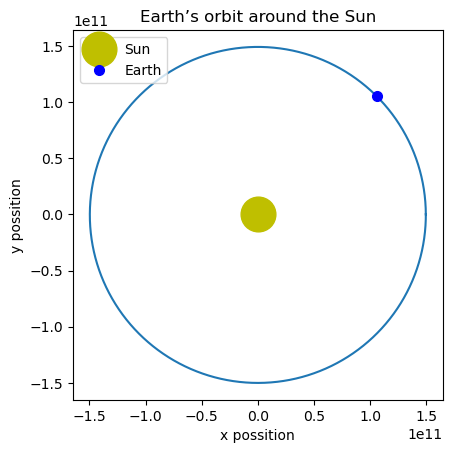

In [38]:
#We want to simulate the orbit across 1 year so our time intervals must go from 0 seconds to 31536000 second
#dt_vals = np.linspace(0, 31536000, 1000)
#We will take a dt of 31567 to have, in 1000 steps, the full orbit
num_steps = 1001
dt = 31536

#Finally let's calculate all the positions that will take the earth around the sun in one year

r = []
v = []
r_x = []
r_y = []

r.append(np.array([R,0]))
v.append(np.array([0,V]))
r_x.append(R)
r_y.append(0)


for i in range(num_steps):
    v_new = v[i] + acc(r[i])*dt
    r_new = r[i]  + v_new*dt
    v.append(v_new)
    r.append(r_new)
    r_x.append(r_new[0])
    r_y.append(r_new[1])

plt.plot(r_x,r_y)
plt.axis('square')
plt.plot(0,0,'y.', markersize=50, label = 'Sun')
plt.plot(R*np.sqrt(2)/2,R*np.sqrt(2)/2,'b.', markersize=14, label = 'Earth')
plt.xlabel('x possition')
plt.ylabel('y possition')
plt.legend(loc = 'upper left')
plt.title('Earth’s orbit around the Sun')
plt.show()

### b)

Now, we will apply the same code and integration way but this time with different time steps $\Delta t$.

We will asses whether a specific time step gives us a good resolution or not comparing the total energy of the final point of the orbit with the initial value. To comput the energy we will use that

$$E = K+U = \frac{1}{2}m_2v^2-G\frac{m_1m_2}{|\vec{r}_2|} \rightarrow \epsilon = \frac{1}{2}v^2-G\frac{m_2}{|\vec{r}_2|}$$

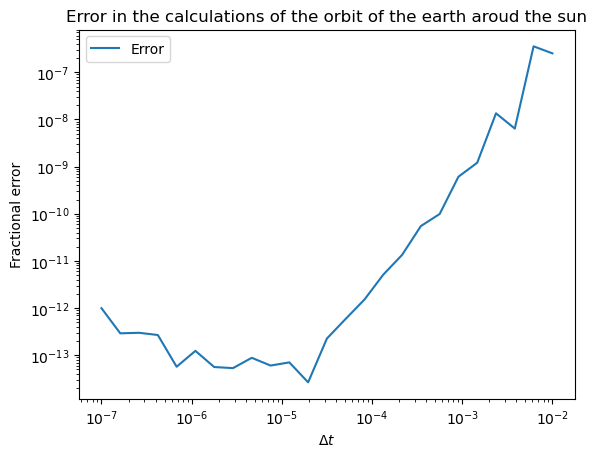

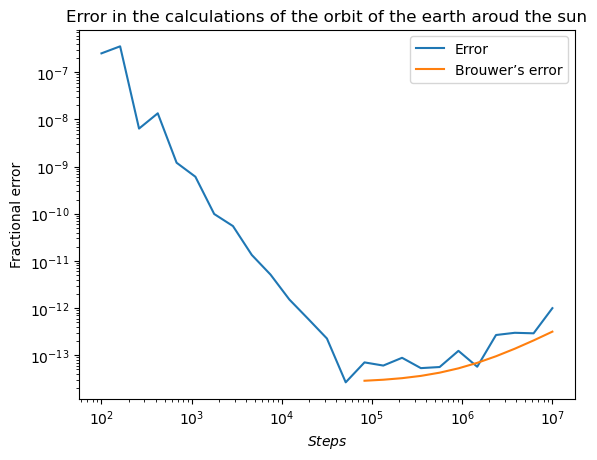

In [73]:
#We start defining the initial energy
E_0 = -(V**2)/2+GM/R

#Then we define all the dt we are going to use and also the steps associated to them    
year = 31536000
dt_vals = (10**np.linspace(-2, -7, 25))*year
num_steps = (year/dt_vals).astype(int)
Error = np.zeros_like(dt_vals)

#For convenience we will be defining a function which will give us directlly the final energy 

def EnergyError(dt,num_steps):
    r = np.array([R,0])
    v = np.array([0,V])
    for i in range(num_steps):
        v = v + acc(r)*dt
        r = r + v*dt
    E = -((np.linalg.norm(v))**2)/2 + GM/np.linalg.norm(r)
    err = abs(E-E_0)/E_0
    return err

for i,dt in enumerate(dt_vals):
    Error[i] = EnergyError(dt,num_steps[i])

# Plot the results
plt.plot(dt_vals/year, Error, label="Error")
plt.title(r'Error in the calculations of the orbit of the earth aroud the sun')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\Delta t$')
plt.ylabel('Fractional error')
plt.legend()
plt.show()


#Now we will plot the error vs the steps needed to complete a full orbit
#We will also see that the increasing of the error follows the values predicted by the Brouwer’s law 
e = 10**(-16)

a = 82540
b=10000000

q = [np.sqrt(a)*e,np.sqrt(b)*e]
w =[a,b]

m,b = np.polyfit(w, q, 1)

plt.plot(num_steps, Error, label="Error")
plt.plot(num_steps[14:], (m*num_steps+b)[14:], label = 'Brouwer’s error')
plt.title(r'Error in the calculations of the orbit of the earth aroud the sun')
plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$Steps$')
plt.ylabel('Fractional error')
plt.legend()
plt.show()


Brouwer's Law states that the total error after taking $N$ steps can be approximated as $e \approx \sqrt{N}\epsilon$, where $\epsilon$ is typically on the order of $10^{-16}$ for double-precision floating-point numbers. When we decrease the time interval the error decreases as well, as we expect dor the semi-implicit Euler method. However, this reduction in error comes at the cost of increasing the number of steps required.

The interesting aspect of Brouwer's Law is that as we increase the number of steps, the error also increases. In the initial stages, this increase is not apparent, mainly because the orders of magnitude of the two types of errors differ significantly(Euler's methor error and Roudoff error). Yet, as we approach machine precision with the Euler's method, we begin to observe an increase in error. This is primarily attributed to the cumulative Roundoff error. (In this cases involving such large numbers, Roudoff error become slightly bigger)

We can see in the previous plot how the error starts to increment with the same ratio as we expected for $\sqrt N\epsilon$.